<a href="https://colab.research.google.com/github/tafataghiles/Base-de-donn-es/blob/master/ProblmeDuSacADos7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dictionaire**
* Nom de l'objet
* Valeur de l'objet
* Masse de l'objet
* Salut

In [146]:
import time
import random
import matplotlib.pyplot as plt
from statistics import *
import seaborn as sns

In [234]:
 
def GenererDic(n):
  
  dic1=[{"nom":str(0),"valeur":str(random.randint(1,500)),"masse":str(random.randint(1,100))}]
  dicv=[]
  for i in range(n):
    dic1=[{"nom":str(i),"valeur":str(random.randint(1,500)),"masse":str(random.randint(1,100))}]
    dicv=dicv+dic1
  return dicv



In [235]:
liste_objets = GenererDic(100)

In [236]:
liste_objets

[{'masse': '27', 'nom': '0', 'valeur': '450'},
 {'masse': '30', 'nom': '1', 'valeur': '283'},
 {'masse': '5', 'nom': '2', 'valeur': '30'},
 {'masse': '25', 'nom': '3', 'valeur': '233'},
 {'masse': '27', 'nom': '4', 'valeur': '143'},
 {'masse': '55', 'nom': '5', 'valeur': '431'},
 {'masse': '14', 'nom': '6', 'valeur': '178'},
 {'masse': '63', 'nom': '7', 'valeur': '399'},
 {'masse': '35', 'nom': '8', 'valeur': '270'},
 {'masse': '68', 'nom': '9', 'valeur': '265'},
 {'masse': '79', 'nom': '10', 'valeur': '439'},
 {'masse': '9', 'nom': '11', 'valeur': '330'},
 {'masse': '31', 'nom': '12', 'valeur': '242'},
 {'masse': '93', 'nom': '13', 'valeur': '164'},
 {'masse': '30', 'nom': '14', 'valeur': '93'},
 {'masse': '52', 'nom': '15', 'valeur': '188'},
 {'masse': '51', 'nom': '16', 'valeur': '265'},
 {'masse': '45', 'nom': '17', 'valeur': '14'},
 {'masse': '53', 'nom': '18', 'valeur': '10'},
 {'masse': '58', 'nom': '19', 'valeur': '172'},
 {'masse': '88', 'nom': '20', 'valeur': '153'},
 {'masse

In [228]:
#liste_objets=[{"nom":"A", "valeur":"1", "masse":"1"},{"nom":"B", "valeur":"6", "masse":"2"},{"nom":"C", "valeur":"10", "masse":"3"},{"nom":"D", "valeur":"16", "masse":"5"}]       

**La fonction Ajout_Ratio():**
  Permet de calculer la l'utilité massique ui/mi et de le rajouter a notre dictionnaire 


In [237]:
#on rajoute a notre liste_objets le ratio ui/mi
def Ajout_Ratio(liste_objets):
  for objet in liste_objets:
    objet["u_m"]=eval(objet["valeur"])/eval(objet["masse"])
  return liste_objets

In [28]:
l=Ajout_Ratio(liste_objets)

In [29]:
l

[{'masse': '86', 'nom': '0', 'u_m': 1.5348837209302326, 'valeur': '132'},
 {'masse': '59', 'nom': '1', 'u_m': 5.322033898305085, 'valeur': '314'},
 {'masse': '64', 'nom': '2', 'u_m': 1.953125, 'valeur': '125'},
 {'masse': '88', 'nom': '3', 'u_m': 4.75, 'valeur': '418'},
 {'masse': '4', 'nom': '4', 'u_m': 107.75, 'valeur': '431'},
 {'masse': '64', 'nom': '5', 'u_m': 5.203125, 'valeur': '333'},
 {'masse': '81', 'nom': '6', 'u_m': 3.111111111111111, 'valeur': '252'},
 {'masse': '58', 'nom': '7', 'u_m': 8.0, 'valeur': '464'},
 {'masse': '6', 'nom': '8', 'u_m': 42.0, 'valeur': '252'},
 {'masse': '25', 'nom': '9', 'u_m': 14.28, 'valeur': '357'}]

**Tester si le poids totatl des élément rangés dans le sac ne depasse pas la capcité du sac**

In [238]:
def TestU(Pt,Capacite,liste_objets):

  for objet in liste_objets:
    assert eval(objet["masse"]), 'la masse ne pas être inferieur à '
  assert Pt>Capacite,'La somme des poids dans le sac ne doit pas depassé la capacité du sac'


In [241]:
# Solution approchée - Algorithme glouton
def sacADos_naif(capacite, liste_objets):
  
    poids_total=0
    i=0
    Ajout_Ratio(liste_objets)
    #Trier la liste des objets selon l'utilité massique en utilisant la fonction sorted
    
    liste_objets_T = sorted(liste_objets, key=lambda x: x["u_m"])

    #Inverser la liste triée (ordre décroissant)
    liste_objets_T.reverse()


    Objets_selection = []
    poids_total = 0
    n= len(liste_objets_T)
    for i in range(n):
        if eval(liste_objets_T[i]["masse"]) + poids_total <= capacite:
          poids_total +=eval(liste_objets_T[i]["masse"])
          Objets_selection.append((liste_objets_T[i]["nom"]))
    return( Objets_selection),poids_total
            

In [242]:
l,p=sacADos_naif(15,liste_objets)


In [243]:
p

15

In [244]:
TestU(p,10,liste_objets)

['783', '216', '716', '315', '611', '178']

In [245]:
def ListXY(n):

  x=[]
  y=[]
  k=n
  for i in range (n):
  
    liste_objets=(GenererDic(k))
    start_time = time.time()
    sacADos_naif(k, liste_objets)
    end_time=time.time()
    k=k+100
    y.append(end_time-start_time)
    x.append(k)
    #print(end_time-start_time)
  return x,y
  



In [246]:
X,Y=ListXY(10)

In [247]:
def AfficherGraphe(n):
  X,Y=ListXY(n)
  sns.set_theme(style="whitegrid")
  ax=sns.lineplot(Y, X)
  ax.set(xlabel='temps dexecution', ylabel='taille du problème')
  plt.show()


0.002084016799926758
0.0037767887115478516
0.003452301025390625
0.0045926570892333984
0.006036043167114258
0.007048606872558594
0.012281656265258789
0.009405136108398438
0.010373115539550781
0.012926816940307617


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


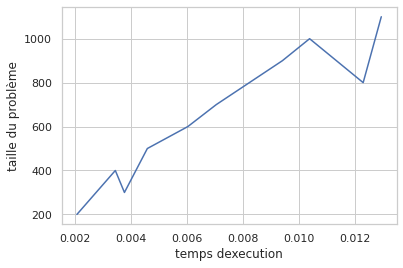

In [155]:
AfficherGraphe(100)

In [125]:
liste_objets=(GenererDic(1000))

[1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010, 1010] [0.018907546997070312, 0.011554718017578125, 0.011843442916870117, 0.011497974395751953, 0.011451959609985352, 0.011690616607666016, 0.011873006820678711, 0.011649847030639648, 0.011602640151977539, 0.011618852615356445]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


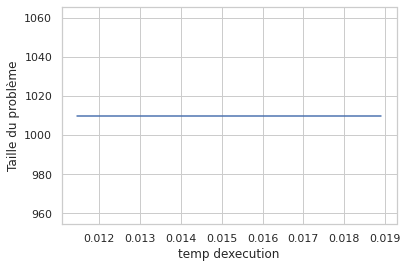

In [127]:
PerformanceAlgo(10,10,liste_objets)

In [45]:

print(end_time-start_time)

0.002122640609741211
